In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV files
user = pd.read_csv('/content/USER_TAKEHOME.csv')
transaction = pd.read_csv('/content/TRANSACTION_TAKEHOME.csv')
product = pd.read_csv('/content/PRODUCTS_TAKEHOME.csv')

User table

In [3]:
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


In [5]:
user.LANGUAGE.value_counts(dropna=False)

,count
LANGUAGE,
en,63403
NaN,30508
es-419,6089


In [6]:
# Update correct data type for two date columns
user['CREATED_DATE'] = pd.to_datetime(user.CREATED_DATE)
user['BIRTH_DATE'] = pd.to_datetime(user.BIRTH_DATE)

In [8]:
# corrected data types, with some missing values
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


Transaction table

In [9]:
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [10]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [11]:
# Update data type for date columns
transaction['PURCHASE_DATE'] = pd.to_datetime(transaction.PURCHASE_DATE)
transaction['SCAN_DATE'] = pd.to_datetime(transaction.SCAN_DATE)

In [12]:
# Duplicated receipt ID with same barcode
# Drop invalid rows with FINAL_QUANTITY = 'zero'
transaction = (
    transaction[transaction['FINAL_QUANTITY'] != 'zero']
    .groupby(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID', 'BARCODE'], as_index=False)
    .agg({
        'FINAL_QUANTITY': 'max',
        'FINAL_SALE': 'max'
    })
)

In [13]:
# Numeric values for quantity and sales volume
transaction.FINAL_QUANTITY = transaction.FINAL_QUANTITY.astype(float).astype(int)
transaction.FINAL_SALE = transaction.FINAL_SALE.astype(float)

In [14]:
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1,1.54
1,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1,2.54
2,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,1,3.49
3,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1,5.29
4,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247000+00:00,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,1,1.46


In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21979 entries, 0 to 21978
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      21979 non-null  object             
 1   PURCHASE_DATE   21979 non-null  datetime64[ns]     
 2   SCAN_DATE       21979 non-null  datetime64[ns, UTC]
 3   STORE_NAME      21979 non-null  object             
 4   USER_ID         21979 non-null  object             
 5   BARCODE         21979 non-null  float64            
 6   FINAL_QUANTITY  21979 non-null  int64              
 7   FINAL_SALE      21979 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.3+ MB


Product table

In [16]:
product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [17]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657470 entries, 0 to 657469
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    657386 non-null  object 
 1   CATEGORY_2    656358 non-null  object 
 2   CATEGORY_3    610406 non-null  object 
 3   CATEGORY_4    52336 non-null   object 
 4   MANUFACTURER  481289 non-null  object 
 5   BRAND         481291 non-null  object 
 6   BARCODE       654366 non-null  float64
dtypes: float64(1), object(6)
memory usage: 35.1+ MB


In [19]:
# Missing barcode for some products
product.isna().sum()

,0
CATEGORY_1,84
CATEGORY_2,1112
CATEGORY_3,47064
CATEGORY_4,605134
MANUFACTURER,176181
BRAND,176179
BARCODE,3104


User base growth over the years

In [20]:
# Yearly growth rate for total users
user['created_year'] = user['CREATED_DATE'].dt.year
users_per_year = user.groupby('created_year').size().reset_index(name='new_users')
users_per_year['total_users'] = users_per_year['new_users'].cumsum()

users_per_year

,created_year,new_users,total_users
0,2014,30,30
1,2015,51,81
2,2016,70,151
3,2017,644,795
4,2018,2168,2963
5,2019,7093,10056
6,2020,16883,26939
7,2021,19159,46098
8,2022,26807,72905
9,2023,15464,88369


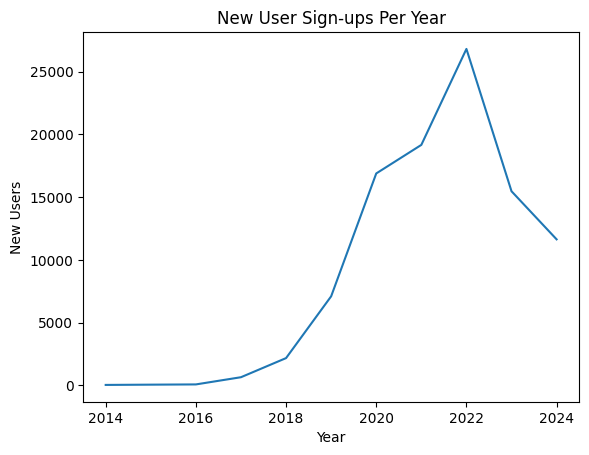

In [21]:
# Plot yearly new user sign-ups
sns.lineplot(data=users_per_year, x='created_year', y='new_users')
plt.title("New User Sign-ups Per Year")
plt.xlabel("Year")
plt.ylabel("New Users")
plt.show()

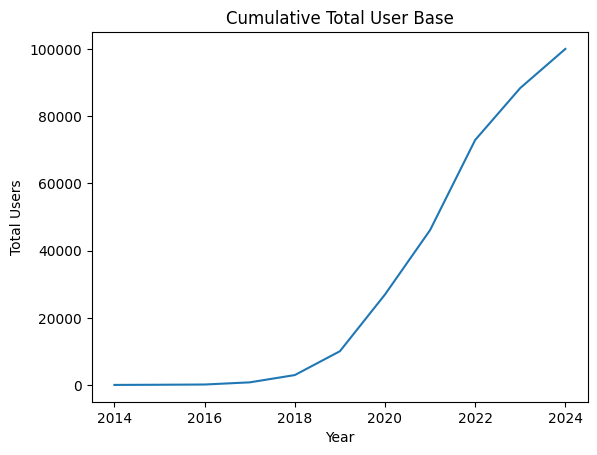

In [22]:
# Total user base growth over the years
sns.lineplot(data=users_per_year, x='created_year', y='total_users')
plt.title("Cumulative Total User Base")
plt.xlabel("Year")
plt.ylabel("Total Users")
plt.show()

Number of transactions over time

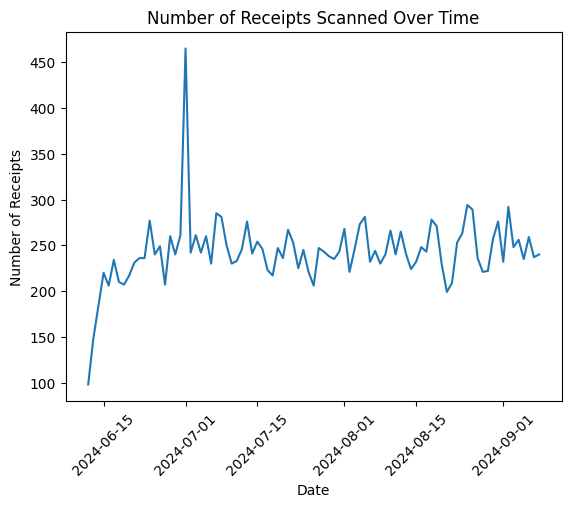

In [23]:
# Transactions over time
# Number of scanned receipts
r_by_date = transaction.groupby(transaction.SCAN_DATE.dt.date)['RECEIPT_ID'].nunique()
sns.lineplot(x=r_by_date.index, y=r_by_date.values)
plt.title("Number of Receipts Scanned Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Receipts")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Find the peak - which date has the most number of receipts?
r_by_date.sort_values(ascending=False)

# 2024-07-01: Any issue or promotion?

,RECEIPT_ID
SCAN_DATE,
2024-07-01,465
2024-08-25,294
2024-09-02,292
2024-08-26,289
2024-07-07,285
...,...
2024-06-16,206
2024-08-21,199
2024-06-14,184
